Importing libraries and modules

In [123]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

Importing dataset

In [124]:
df = pd.read_csv('H2.csv')

Inspecting the dataset

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [126]:
#pd.set_option('display.max_columns', None)
print(df.head())

   IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  Babies       Meal Country  \
0                  2       1       0.0       0  HB            PRT   
1                  4       2       0.0       0  BB      

Preprocess input data

In [127]:
#Dropping columns that does not have significance in predicting hotel booking cancellation
df.drop('ArrivalDateYear', axis=1, inplace=True)
df.drop('ArrivalDateWeekNumber', axis=1, inplace=True)
df.drop('ArrivalDateDayOfMonth', axis=1, inplace=True)

#Converting text values in ArrivalDateMonth column to numeric values
month_dict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
              'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12 }
df["ArrivalDateMonth"] = df["ArrivalDateMonth"].apply(lambda x: month_dict.get(x))

#Converting Children column to integer
df['Children'] = df['Children'].fillna(0)
df["Children"] = df["Children"].astype(int)

#Converting text values in Meal column to numeric values
df['Meal'] = df['Meal'].str.strip()
df['Meal'].mask(df['Meal'] == 'SC', 0, inplace=True)
df['Meal'].mask(df['Meal'] == 'BB', 1, inplace=True)
df['Meal'].mask(df['Meal'] == 'HB', 2, inplace=True)
df['Meal'].mask(df['Meal'] == 'FB', 3, inplace=True)

#Converting text values in Country column to numeric values
country_dict = dict.fromkeys(df.Country.unique())
country_dict = dict(zip(country_dict, range(0,len(df.Country.unique()))))
df["Country"] = df["Country"].apply(lambda x: country_dict.get(x))

#Converting text values in MarketSegment column to numeric values
market_segment_dict = dict.fromkeys(df.MarketSegment.unique())
market_segment_dict = dict(zip(market_segment_dict, range(0,len(df.MarketSegment.unique()))))
df["MarketSegment"] = df["MarketSegment"].apply(lambda x: market_segment_dict.get(x))

#Converting text values in DistributionChannel column to numeric values
distribution_channel_dict = dict.fromkeys(df.DistributionChannel.unique())
distribution_channel_dict = dict(zip(distribution_channel_dict, range(0,len(df.DistributionChannel.unique()))))
df["DistributionChannel"] = df["DistributionChannel"].apply(lambda x: distribution_channel_dict.get(x))

#Converting text values in ReservedRoomType column to numeric values
df['ReservedRoomType'] = df['ReservedRoomType'].str.strip()
reserved_room_type_dict = dict.fromkeys(df.ReservedRoomType.unique())
reserved_room_type_dict = dict(zip(reserved_room_type_dict, range(0,len(df.ReservedRoomType.unique()))))
df["ReservedRoomType"] = df["ReservedRoomType"].apply(lambda x: reserved_room_type_dict.get(x))

#Converting text values in AssignedRoomType column to numeric values
df['AssignedRoomType'] = df['AssignedRoomType'].str.strip()
assigned_room_type_dict = dict.fromkeys(df.AssignedRoomType.unique())
assigned_room_type_dict = dict(zip(assigned_room_type_dict, range(0,len(df.AssignedRoomType.unique()))))
df["AssignedRoomType"] = df["AssignedRoomType"].apply(lambda x: assigned_room_type_dict.get(x))

#Converting text values in DepositType column to numeric values
df['DepositType'] = df['DepositType'].str.strip()
deposit_type_dict = dict.fromkeys(df.DepositType.unique())
deposit_type_dict = dict(zip(deposit_type_dict, range(0,len(df.DepositType.unique()))))
df["DepositType"] = df["DepositType"].apply(lambda x: deposit_type_dict.get(x))

#Replacing '       NULL' value in Agent column to 0 
df['Agent'] = df.Agent.apply(lambda a: 0 if a == '       NULL' else a)
#Converting Agent column to integer
df['Agent'] = df['Agent'].astype(int)
#Replacing '       NULL' value in Company column to 0
df['Company'] = df.Company.apply(lambda c: 0 if c == '       NULL' else c)
#Converting Company column to integer
df['Company'] = df['Company'].astype(int)

#Converting text values in CustomerType column to numeric values
customer_type_dict = dict.fromkeys(df.CustomerType.unique())
customer_type_dict = dict(zip(customer_type_dict, range(0,len(df.CustomerType.unique()))))
df["CustomerType"] = df["CustomerType"].apply(lambda x: customer_type_dict.get(x))

#Converting text values in ReservationStatus column to numeric values
reservation_status_dict = dict.fromkeys(df.ReservationStatus.unique())
reservation_status_dict = dict(zip(reservation_status_dict, range(0,len(df.ReservationStatus.unique()))))
df["ReservationStatus"] = df["ReservationStatus"].apply(lambda x: reservation_status_dict.get(x))

#Dropping ReservationStatus column
df.drop('ReservationStatus', axis=1, inplace=True)

#Dropping ReservationStatusDate column 
df.drop('ReservationStatusDate', axis=1, inplace=True)

In [128]:
#pd.set_option('display.max_columns', None)
print(df.head())

   IsCanceled  LeadTime  ArrivalDateMonth  StaysInWeekendNights  \
0           0         6                 7                     0   
1           1        88                 7                     0   
2           1        65                 7                     0   
3           1        92                 7                     2   
4           1       100                 7                     0   

   StaysInWeekNights  Adults  Children  Babies Meal  Country  MarketSegment  \
0                  2       1         0       0    2        0              0   
1                  4       2         0       0    1        0              1   
2                  4       1         0       0    1        0              1   
3                  4       2         0       0    1        0              1   
4                  2       2         0       0    1        0              1   

   DistributionChannel  IsRepeatedGuest  PreviousCancellations  \
0                    0                0                 

Splitting the dataset into input features (X) and output (y)

In [103]:
X = df.drop('IsCanceled', axis=1)
y = df['IsCanceled']

Normalizing the input features

In [104]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

Splitting dataset into training and testing sets

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63464, 25)
(63464,)
(15866, 25)
(15866,)


Defining model architecture

In [107]:
model = Sequential() 
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compiling model

In [108]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Defining Model Checkpoint

In [109]:
checkpoint_filepath = 'model.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, 
    save_weights_only=False, 
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True)

Fitting model on training data

In [110]:
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[model_checkpoint_callback])

Epoch 1/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.4042 - accuracy: 0.8090 - val_loss: 0.3713 - val_accuracy: 0.8240
Epoch 2/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3639 - accuracy: 0.8272 - val_loss: 0.3592 - val_accuracy: 0.8291
Epoch 3/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3503 - accuracy: 0.8345 - val_loss: 0.3560 - val_accuracy: 0.8338
Epoch 4/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8385 - val_loss: 0.3467 - val_accuracy: 0.8327
Epoch 5/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3358 - accuracy: 0.8415 - val_loss: 0.3378 - val_accuracy: 0.8431


Loading model saved in earlier step

In [111]:
model = load_model(checkpoint_filepath)

Evaluating model on test data

In [112]:
score = model.evaluate(X_test, y_test)

496/496 [==============================] - 1s 1ms/step - loss: 0.3378 - accuracy: 0.8431


In [113]:
score

[0.337772011756897, 0.8430606126785278]

Visualizing Accuracy and Loss

In [114]:
import matplotlib.pyplot as plt

Plotting the training and validation accuracy over epochs

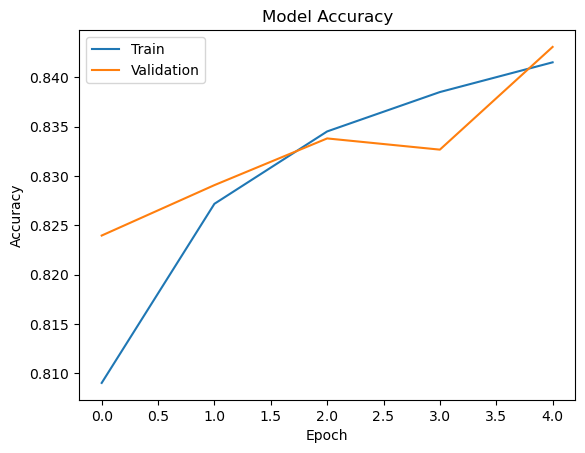

In [115]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Plotting the training and validation loss over epochs

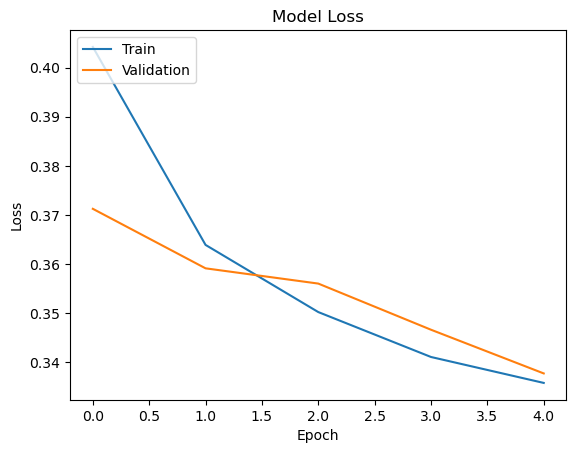

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()